In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# https://www.eia.gov/dnav/ng/NG_PROD_SUM_DC_NUS_MMCF_A.htm
sources = {
    "gas": 'https://www.eia.gov/dnav/ng/hist_xls/N9011US2a.xls',
    "shale": 'https://www.eia.gov/dnav/ng/hist_xls/NGM_EPG0_FGS_NUS_MMCFa.xls',
    "oil": 'https://www.eia.gov/dnav/ng/hist_xls/N9012US2a.xls',
}
out = {}
for name, url in sources.items():
    df = pd.read_excel(url, sheet_name='Data 1', skiprows=2).set_index('Date')
    series = df[df.columns[0]]
    series.name = name
    out[name] = series

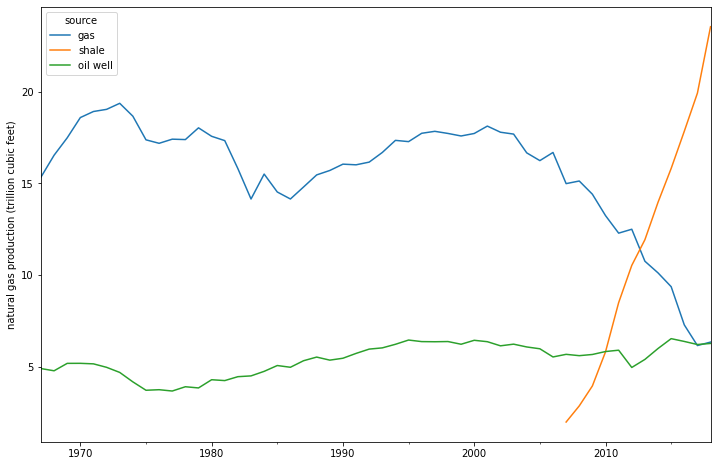

In [4]:
df = (pd.DataFrame(out) / 1e6).rename(columns={'oil': 'oil well'})
df.columns.name = 'source'
df.plot(figsize=(12, 8));
plt.ylabel('natural gas production (trillion cubic feet)')
plt.xlabel('');
plt.savefig('natural-gas-source.png')